In [147]:
import matplotlib.pyplot as plt
import pandas as pd

path = '../compare_data/'

flatten = pd.read_csv(f'{path}flatten_article.csv')
gangnam_trade = pd.read_csv(f'{path}gangnam_trade.csv')
gangnam_rent = pd.read_csv(f'{path}gangnam_rent.csv')

In [148]:
def analysis_function(data):
    result = []
    many = len(data)
    for i in range(3,many):
        a = data[i] - (data[i-1]+data[i-2]+data[i-3])/3
        result.append(abs(a))
    return result

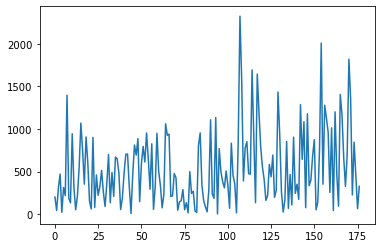

In [149]:
flatten_an = analysis_function(flatten['data'])
plt.plot(flatten_an)

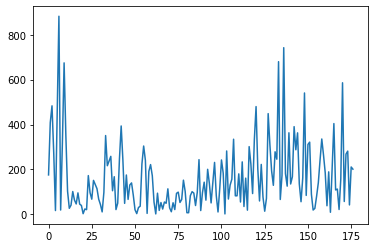

In [150]:
gangnam_trade['count'].astype('double')
gangnam_trade_an = analysis_function(gangnam_trade['count'])
plt.plot(gangnam_trade_an)

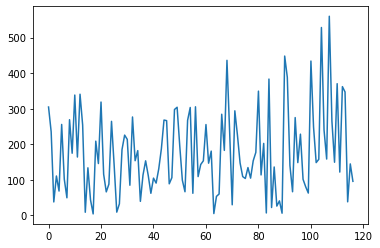

In [151]:
gangnam_rent['count'].astype('double')
gangnam_rent_an = analysis_function(gangnam_rent['count'])
plt.plot(gangnam_rent_an)

In [152]:
def find_delay(data1,data2):
    df = pd.DataFrame({"v1" : data1[:], "v2" : data2[:]})
    corr = df.corr(method = 'pearson') 
    max_rate = corr.iloc[1,0]
    max_index = 0
    
    for i in range(1,12):
        df = pd.DataFrame({"v1" : data1[:-i], "v2" : data2[i:]})
        corr = df.corr(method = 'pearson') 
        if corr.iloc[1,0] > max_rate:
            max_rate = corr.iloc[1,0]
            max_index = i
    return (max_rate, max_index)

In [153]:
result = find_delay(flatten_an[100:], gangnam_trade_an[100:])

print(result)

(0.13165565728556058, 2)
